This notebook details how we can run inference with a yolov5 model and extract the information about the object detected

In [8]:
import tensorflow as tf
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import torch
%matplotlib inline

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='best.pt')
#model.eval()

Using cache found in /home/mahdi/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-4-24 torch 1.11.0+cu102 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4040MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [4]:
img = cv2.imread('road3.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_rgb = cv2.resize(img_rgb, (640, 640), cv2.INTER_AREA)
#img_rgb = img_rgb.reshape([1, 640, 640, 3])

#img_rgb = np.array(img_rgb, dtype=np.float32)

In [5]:
# Inference
results = model(img_rgb,size=640)

In [6]:
results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,284.38208,286.599854,378.235962,553.778625,0.775293,0,trafficlight


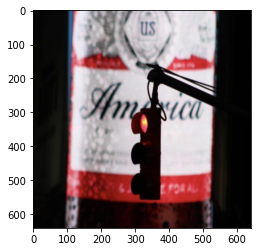

In [9]:
plt.imshow(np.array(img_rgb))
plt.show()

In [10]:
start_point=(int(results.pandas().xyxy[0].loc[0].xmin),int(results.pandas().xyxy[0].loc[0].ymin))
end_point=(int(results.pandas().xyxy[0].loc[0].xmax),int(results.pandas().xyxy[0].loc[0].ymax))
# Blue color in BGR
color = (255, 0, 0)
  
# Line thickness of 2 px
thickness = 2

img_rgb = cv2.rectangle(img_rgb, start_point, end_point, color, thickness)

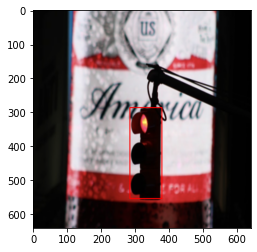

In [11]:
plt.imshow(np.array(img_rgb))
plt.show()